In [60]:
import numpy as np
import pandas as pd
import seaborn as sns

In [61]:
df=pd.read_csv('/content/heart_disease_uci.csv')

In [62]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [63]:
df.shape

(920, 16)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [65]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [66]:
df.drop(columns=['id','dataset','thal','ca'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,0


In [67]:
catog_columns=df.select_dtypes(include=['object']).columns
numrical_columns=df.select_dtypes(include=['int64','float64']).columns

In [68]:
for col in df.columns:
  if df[col].dtype == "object":
    df[col] = df[col].fillna(df[col].mode()[0])
  else:
     df[col] = df[col].fillna(df[col].median())

/tmp/ipython-input-2985727667.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [69]:
df = pd.get_dummies(df, drop_first=True)

In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
x=df.drop(columns=['num'])
y=df['num']

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
minmax_scaler = MinMaxScaler()
x_train= minmax_scaler.fit_transform(x_train)
x_test= minmax_scaler.transform(x_test)

In [73]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [74]:
pca = PCA()
pca.fit(x_train)

PCA()

In [75]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)


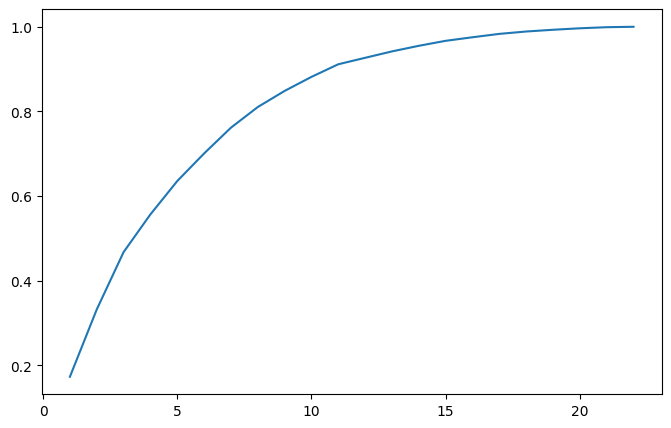

In [76]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance)

In [77]:
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [80]:
rf_importances = pd.Series(rf.feature_importances_, index=x.columns)
top_rf = rf_importances.sort_values(ascending=False).head(10).index.tolist()
indices = rf_importances.argsort()[::-1]

/tmp/ipython-input-774870602.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(range(15), rf_importances[indices[:15]], align='center')


([<matplotlib.axis.XTick at 0x7b429d78b980>,
 [Text(0, 0, 'id'),
  Text(1, 0, 'thalch'),
  Text(2, 0, 'oldpeak'),
  Text(3, 0, 'age'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'trestbps'),
  Text(6, 0, 'exang'),
  Text(7, 0, 'ca'),
  Text(8, 0, 'dataset_Hungary'),
  Text(9, 0, 'cp_atypical angina'),
  Text(10, 0, 'thal_normal'),
  Text(11, 0, 'sex_Male'),
  Text(12, 0, 'cp_non-anginal'),
  Text(13, 0, 'restecg_normal'),
  Text(14, 0, 'thal_reversable defect')])

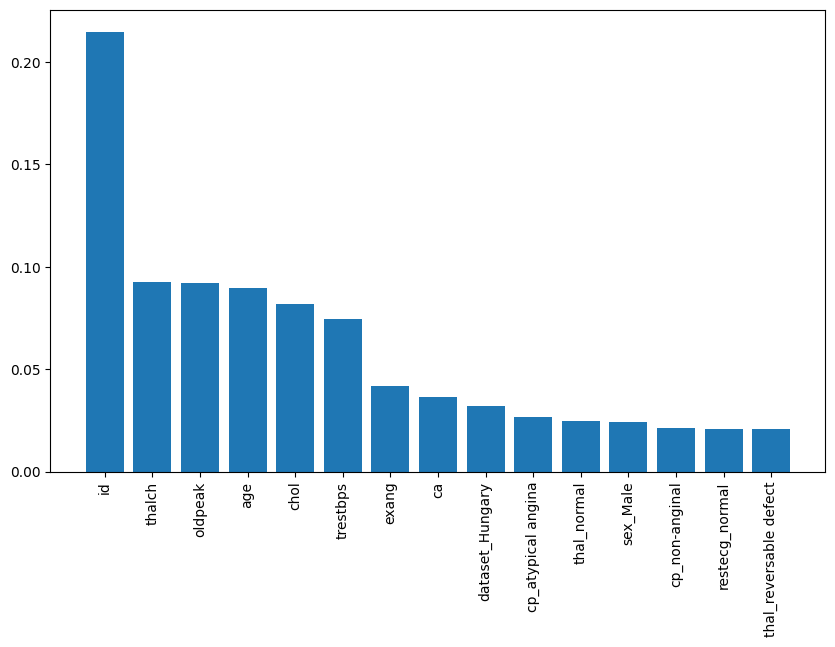

In [81]:
plt.figure(figsize=(10,6))
plt.bar(range(15), rf_importances[indices[:15]], align='center')
plt.xticks(range(15), x.columns[indices[:15]], rotation=90)

In [82]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [86]:
lr = LogisticRegression(max_iter=1000)
rfe = RFE(lr, n_features_to_select=10)
rfe = rfe.fit(x_train, y_train)
top_rfe = x.columns[rfe.support_].tolist()


In [84]:
selected_features = x.columns[rfe.support_]
print(selected_features)


Index(['id', 'thalch', 'exang', 'oldpeak', 'ca', 'sex_Male', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina'],
      dtype='object')


In [87]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(x_train, y_train)
top_chi2 = x.columns[chi2_selector.get_support()].tolist()



In [90]:
all_features = top_rf + top_rfe + top_chi2
final_features = pd.Series(all_features).value_counts()
print("🔹 Top 10 by Random Forest:", top_rf)
print("🔹 Top 10 by RFE:", top_rfe)
print("🔹 Top 10 by Chi2:", top_chi2)

print(final_features)


🔹 Top 10 by Random Forest: ['id', 'thalch', 'oldpeak', 'age', 'chol', 'trestbps', 'exang', 'ca', 'dataset_Hungary', 'cp_atypical angina']
🔹 Top 10 by RFE: ['id', 'thalch', 'exang', 'oldpeak', 'ca', 'sex_Male', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina']
🔹 Top 10 by Chi2: ['exang', 'ca', 'sex_Male', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'slope_upsloping', 'thal_reversable defect']
exang                     3
ca                        3
cp_atypical angina        3
dataset_Hungary           3
oldpeak                   2
sex_Male                  2
id                        2
thalch                    2
dataset_VA Long Beach     2
dataset_Switzerland       2
age                       1
trestbps                  1
chol                      1
cp_non-anginal            1
slope_upsloping           1
thal_reversable defect    1
Name: count, dtype: int64


In [91]:
common_features = set(top_rf) & set(top_rfe) & set(top_chi2)
from collections import Counter
all_features = top_rf + top_rfe + top_chi2
counts = Counter(all_features)
majority_features = [f for f, c in counts.items() if c >= 2]

In [93]:
final_features = list(common_features)
if len(final_features) < 5:
    final_features = majority_features

In [95]:
print("Final Selected Features for Modeling:", final_features)


Final Selected Features for Modeling: ['id', 'thalch', 'oldpeak', 'exang', 'ca', 'dataset_Hungary', 'cp_atypical angina', 'sex_Male', 'dataset_Switzerland', 'dataset_VA Long Beach']


In [96]:
X_train_final = x_train[:, [list(x.columns).index(f) for f in final_features]]
X_test_final = x_test[:, [list(x.columns).index(f) for f in final_features]]

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
lr = LogisticRegression(max_iter=2000, random_state=42)
lr.fit(X_train_final, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [99]:
y_pred_lr = lr.predict(X_test_final)


In [100]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\n Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.5271739130434783

 Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.93      0.75        75
           1       0.41      0.43      0.42        54
           2       0.00      0.00      0.00        25
           3       0.27      0.15      0.20        26
           4       0.00      0.00      0.00         4

    accuracy                           0.53       184
   macro avg       0.26      0.30      0.27       184
weighted avg       0.41      0.53      0.46       184


 Confusion Matrix:
 [[70  5  0  0  0]
 [25 23  0  6  0]
 [ 7 14  0  4  0]
 [ 9 13  0  4  0]
 [ 1  1  1  1  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [102]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_final, y_train)
y_pred_dt = dt.predict(X_test_final)

In [103]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_final, y_train)
y_pred_rf = rf.predict(X_test_final)

In [104]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_final, y_train)
y_pred_svm = svm.predict(X_test_final)

In [105]:
models = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}

In [106]:
from sklearn.metrics import classification_report, accuracy_score

for name, preds in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))


Logistic Regression
Accuracy: 0.5271739130434783
              precision    recall  f1-score   support

           0       0.62      0.93      0.75        75
           1       0.41      0.43      0.42        54
           2       0.00      0.00      0.00        25
           3       0.27      0.15      0.20        26
           4       0.00      0.00      0.00         4

    accuracy                           0.53       184
   macro avg       0.26      0.30      0.27       184
weighted avg       0.41      0.53      0.46       184


Decision Tree
Accuracy: 0.5815217391304348
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        75
           1       0.61      0.52      0.56        54
           2       0.42      0.44      0.43        25
           3       0.24      0.15      0.19        26
           4       0.00      0.00      0.00         4

    accuracy                           0.58       184
   macro avg       0.39      0.39    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score

In [108]:
models_proba = {
    "Logistic Regression": lr.predict_proba(X_test_final)[:,1],
    "Decision Tree": dt.predict_proba(X_test_final)[:,1],
    "Random Forest": rf.predict_proba(X_test_final)[:,1],
    "SVM": svm.predict_proba(X_test_final)[:,1]
}

In [109]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [111]:
from sklearn.cluster import KMeans


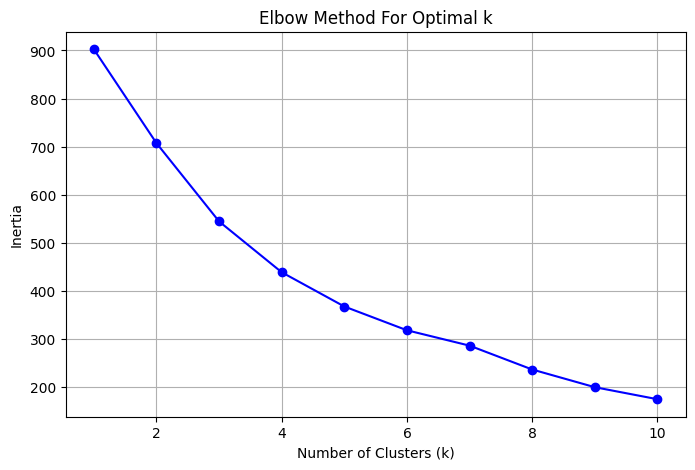

In [114]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_final)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.grid(True)
plt.show()

In [115]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_test_final)


In [116]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix (Clusters vs Actual):")
print(confusion_matrix(y_test, clusters))

Confusion Matrix (Clusters vs Actual):
[[46 29  0  0  0]
 [11 43  0  0  0]
 [ 0 25  0  0  0]
 [ 1 25  0  0  0]
 [ 0  4  0  0  0]]


In [117]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [118]:
Z = linkage(X_train_final, method='ward')


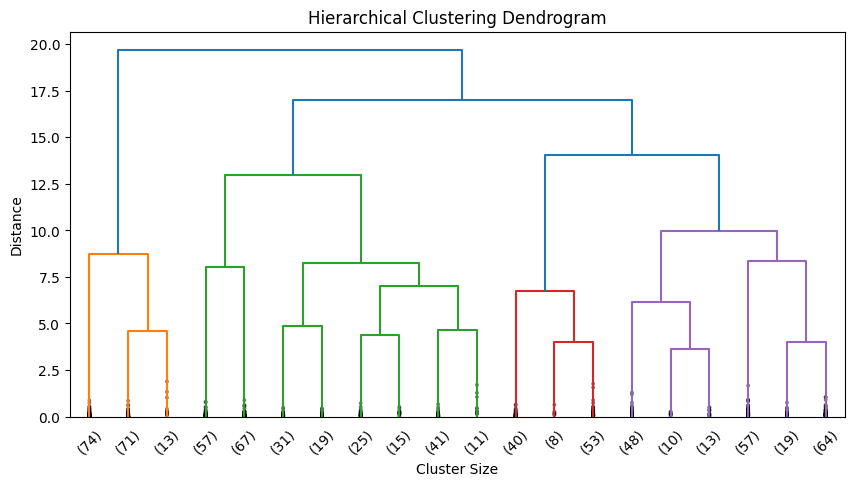

In [119]:
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="lastp", p=20, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


In [120]:
clusters_hc = fcluster(Z, t=2, criterion='maxclust')
from sklearn.metrics import confusion_matrix
print("Confusion Matrix (Hierarchical Clusters vs Actual):")
print(confusion_matrix(y_train, clusters_hc))

Confusion Matrix (Hierarchical Clusters vs Actual):
[[  0  44 292   0   0]
 [  0  41 170   0   0]
 [  0  32  52   0   0]
 [  0  33  48   0   0]
 [  0   8  16   0   0]]


In [121]:
from sklearn.model_selection import GridSearchCV


In [122]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [124]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [125]:
grid_search.fit(X_train_final, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 0.6398970398970399


In [126]:
best_rf = grid_search.best_estimator_
from sklearn.metrics import accuracy_score, classification_report
y_pred_best_rf = best_rf.predict(X_test_final)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Test Accuracy: 0.5869565217391305
              precision    recall  f1-score   support

           0       0.62      0.95      0.75        75
           1       0.60      0.57      0.58        54
           2       0.57      0.16      0.25        25
           3       0.20      0.08      0.11        26
           4       0.00      0.00      0.00         4

    accuracy                           0.59       184
   macro avg       0.40      0.35      0.34       184
weighted avg       0.53      0.59      0.53       184



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [127]:
import joblib


joblib.dump(best_rf, "final_model.pkl")

print("Model saved as final_model.pkl")

Model saved as final_model.pkl


In [128]:
loaded_model = joblib.load("final_model.pkl")


sample_pred = loaded_model.predict(X_test_final[:5])
print("Sample Predictions:", sample_pred)

Sample Predictions: [0 0 1 0 1]


In [129]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.0 MB/s eta 0:00:00


In [130]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

model = joblib.load("final_model.pkl")

st.title("💓 Heart Disease Prediction App")

age = st.number_input("Age", min_value=20, max_value=100, value=50)
sex = st.selectbox("Sex", ["Male", "Female"])
chol = st.number_input("Cholesterol", min_value=100, max_value=600, value=200)

sex_val = 1 if sex == "Male" else 0

features = np.array([[age, sex_val, chol]])

if st.button("Predict"):
    prediction = model.predict(features)
    if prediction[0] == 1:
        st.error("⚠️ Likely Heart Disease")
    else:
        st.success("✅ No Heart Disease Detected")


Writing app.py


In [139]:
!ngrok config add-authtoken 33LF0FMWzPjQ9PEyKNyJKIlyfkJ_5fjqf7M3AEfpqU6HJfbpm


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [140]:
from pyngrok import ngrok

public_url = ngrok.connect(8501)
print("Public URL:", public_url)

!streamlit run app.py --server.port 8501 &>/dev/null&

Public URL: NgrokTunnel: "https://pileous-kory-parodiable.ngrok-free.dev" -> "http://localhost:8501"


In [141]:
from pyngrok import ngrok

public_url = ngrok.connect(8501)
print("Public URL:", public_url)

!streamlit run app.py --server.port 8501 &>/dev/null&

Public URL: NgrokTunnel: "https://pileous-kory-parodiable.ngrok-free.dev" -> "http://localhost:8501"


In [142]:
print(final_features)


['id', 'thalch', 'oldpeak', 'exang', 'ca', 'dataset_Hungary', 'cp_atypical angina', 'sex_Male', 'dataset_Switzerland', 'dataset_VA Long Beach']


In [143]:
%%writefile app.py


Overwriting app.py


In [144]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

model = joblib.load("final_model.pkl")

st.title("💓 Heart Disease Prediction App")

id_val = st.number_input("Patient ID", min_value=1, value=1)

thalch = st.number_input("Max Heart Rate (thalch)", min_value=70, max_value=220, value=150)
oldpeak = st.number_input("ST Depression (oldpeak)", min_value=0.0, max_value=10.0, value=1.0)

exang = st.selectbox("Exercise Induced Angina (exang)", ["No", "Yes"])
exang_val = 1 if exang == "Yes" else 0

ca = st.number_input("Number of Major Vessels (ca)", min_value=0, max_value=4, value=0)

dataset = st.selectbox("Dataset Source", ["Cleveland", "Hungary", "Switzerland", "VA Long Beach"])
dataset_Hungary = 1 if dataset == "Hungary" else 0
dataset_Switzerland = 1 if dataset == "Switzerland" else 0
dataset_VA = 1 if dataset == "VA Long Beach" else 0

cp = st.selectbox("Chest Pain Type", ["typical angina", "atypical angina"])
cp_atypical = 1 if cp == "atypical angina" else 0

sex = st.selectbox("Sex", ["Female", "Male"])
sex_male = 1 if sex == "Male" else 0

features = np.array([[id_val, thalch, oldpeak, exang_val, ca,
                      dataset_Hungary, cp_atypical, sex_male,
                      dataset_Switzerland, dataset_VA]])

if st.button("Predict"):
    prediction = model.predict(features)
    if prediction[0] == 1:
        st.error("⚠️ Likely Heart Disease")
    else:
        st.success("✅ No Heart Disease Detected")


Overwriting app.py


In [146]:
%%bash

# 1) أنشئ هيكل المجلدات
mkdir -p Heart_Disease_Project/{data,notebooks,models,ui,results}

# 2) انسخ ملف الداتا (جرب من /mnt/data ثم /content)
if [ -f "/mnt/data/heart_disease_uci.csv" ]; then
  cp /mnt/data/heart_disease_uci.csv Heart_Disease_Project/data/
  echo "Dataset copied from /mnt/data"
elif [ -f "heart_disease_uci.csv" ]; then
  cp heart_disease_uci.csv Heart_Disease_Project/data/
  echo "Dataset copied from current directory"
else
  echo "Dataset not found in /mnt/data nor current dir. Upload it or give path."
fi

# 3) انقل الموديل إذا موجود في current dir
if [ -f "final_model.pkl" ]; then
  cp final_model.pkl Heart_Disease_Project/models/
  echo "final_model.pkl copied to models/"
else
  echo "final_model.pkl not found in current directory."
fi

# 4) اعرض محتويات المشروع للتأكد
echo "---- Project root ----"
ls -la Heart_Disease_Project
echo "---- data ----"
ls -la Heart_Disease_Project/data
echo "---- models ----"
ls -la Heart_Disease_Project/models

Dataset copied from current directory
final_model.pkl copied to models/
---- Project root ----
total 28
drwxr-xr-x 7 root root 4096 Sep 28 19:59 .
drwxr-xr-x 1 root root 4096 Sep 28 19:59 ..
drwxr-xr-x 2 root root 4096 Sep 28 19:59 data
drwxr-xr-x 2 root root 4096 Sep 28 19:59 models
drwxr-xr-x 2 root root 4096 Sep 28 19:59 notebooks
drwxr-xr-x 2 root root 4096 Sep 28 19:59 results
drwxr-xr-x 2 root root 4096 Sep 28 19:59 ui
---- data ----
total 88
drwxr-xr-x 2 root root  4096 Sep 28 19:59 .
drwxr-xr-x 7 root root  4096 Sep 28 19:59 ..
-rw-r--r-- 1 root root 79346 Sep 28 19:59 heart_disease_uci.csv
---- models ----
total 276
drwxr-xr-x 2 root root   4096 Sep 28 19:59 .
drwxr-xr-x 7 root root   4096 Sep 28 19:59 ..
-rw-r--r-- 1 root root 272481 Sep 28 19:59 final_model.pkl


In [147]:
# استبدل "YourNotebook.ipynb" بالاسم الفعلي اللي نزلته/رفعته
!cp "Untitled20.ipynb" Heart_Disease_Project/notebooks/01_data_preprocessing.ipynb

!ls -la Heart_Disease_Project/notebooks


cp: cannot stat 'Untitled20.ipynb': No such file or directory
total 8
drwxr-xr-x 2 root root 4096 Sep 28 19:59 .
drwxr-xr-x 7 root root 4096 Sep 28 19:59 ..
